In [1]:
!pip install langdetect

/bin/pip:6: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import load_entry_point


In [ ]:
import json
from langdetect import detect
import matplotlib.pyplot as plt

### Chargement des documents depuis le fichier JSON

In [2]:
with open('data/documents.json', 'r') as f:
    documents = json.load(f)

# Décompte du nombre d'articles par langue

In [3]:
# Initialiser un dictionnaire pour stocker le nombre d'articles par langue
articles_par_langue = {}
langues_non_reconnues = []

for doc in documents:
    content = doc['content']  
    try:
        langue = detect(content)
        if langue in articles_par_langue:
            articles_par_langue[langue] += 1
        else:
            articles_par_langue[langue] = 1
        if langue not in ['fr', 'en']:
            langues_non_reconnues.append((langue, content))
    except:
        # En cas d'erreur lors de la détection de la langue, ignorer le document
        pass

# Afficher le nombre d'articles par langue
for langue, nombre_articles in articles_par_langue.items():
    print(f"Langue: {langue}, Nombre d'articles: {nombre_articles}")


Langue: fr, Nombre d'articles: 13439
Langue: en, Nombre d'articles: 85
Langue: nl, Nombre d'articles: 3
Langue: de, Nombre d'articles: 10
Langue: da, Nombre d'articles: 3
Langue: es, Nombre d'articles: 1
Langue: ca, Nombre d'articles: 6
Langue: ro, Nombre d'articles: 1


# Visualisation des résultats

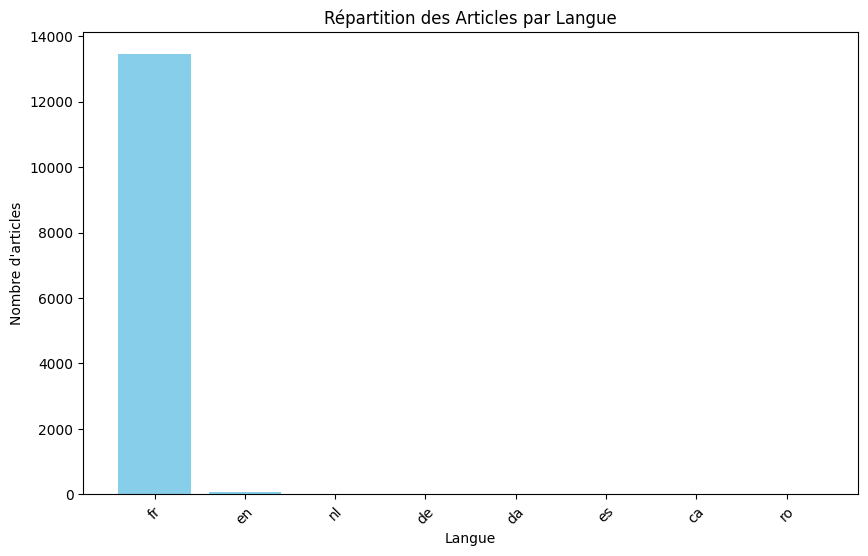

In [4]:
langues = list(articles_par_langue.keys())
articles = list(articles_par_langue.values())

plt.figure(figsize=(10, 6))
plt.bar(langues, articles, color='skyblue')
plt.xlabel('Langue')
plt.ylabel('Nombre d\'articles')
plt.title('Répartition des Articles par Langue')
plt.xticks(rotation=45)
plt.show()

# Observation des contenues des langues autres que le français et l'anglais

In [5]:
for langue, contenue in langues_non_reconnues:
    print(f"Langue: {langue}, Contenu: {contenue}")

Langue: nl, Extrait: facebook twitter google_plus pinterest instagram - Bonne visite et bon jardinage
Langue: de, Extrait: Erreur – Patrick Jouffret Industrial Design
Langue: da, Extrait: erreur 404 error
Langue: de, Extrait: Möchtest du ein Wort, eine Phrase oder eine Übersetzung hinzufügen?Sende uns gern einen neuen Eintrag. Wie kann ich Übersetzungen in den Vokabeltrainer übernehmen? Bitte beachte, dass die Vokabeln in der Vokabelliste nur in diesem Browser zur Verfügung stehen. Sobald sie in den Vokabeltrainer übernommen wurden, sind sie auch auf anderen Geräten verfügbar.
Langue: nl, Extrait: Passer la navigation Soit JavaScript n'est pas activé pour votre navigateur, soit celui-ci ne prend pas en charge suffisamment de fonctions JavaScript pouvoir être utilisé de façon satisfaisante sur ce site. Produits Professionnels Services News Boutique en ligne Promotions My Panasonic Services France / Français Choisissez votre pays ou région UK & Ireland / English Österreich / Deutsch Belg

# Conclusion

Hormis les textes en allemand et celui en espagnol, les autres sont soit actuellement en français et comportent des textes latins sans signification (les textes déduits en catalan), ou ne comportent qu'un ou quelques mots, ce qui rend difficile la détection de la langue. Par exemple, l'article contenant : 'internal_server_error 500' est considéré comme danois.

Ainsi, dans notre programme, nous ne prendrons en compte que les langues française, anglaise, allemande et espagnole. Toute autre langue détectée sera considérée comme du français.